# Credit Card Default Detect

## Kaggle's Credit Card Fraud Dataset - RF

### Overview
Apply Logistic Regression and Random Forest to the problem of detecting credit card fraud

Improve models

Compare performance metrics among models

* The data is from: https://www.kaggle.com/mlg-ulb/creditcardfraud

* Note that there are 28 anonymized variables in the data set and the charge amount. The variable "Class" is 0 for no fraud and 1 if the charge was fraudulent. 


## Data Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,precision_recall_curve,roc_curve,recall_score, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

### 1 Data Overview: 
Transaction data volume: 284807 and 0.1727% of data is fraudulent. 

In [3]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.Class.mean()

0.001727485630620034

In [24]:
# description analysis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Normalize the data
df1 = df.copy()
var = df1.drop(['Class'], axis=1).columns.tolist()

In [7]:
from scipy import stats
norm_df = df1.apply(lambda x:stats.normaltest(x)[1])
print("There are %d features normally distributed." % ((norm_df<0.05).sum()))
print("Top 5 features with highest P value:")
norm_df.sort_values(ascending=False).head()

There are 31 features normally distributed.
Top 5 features with highest P value:


V13      2.419974e-126
Class     0.000000e+00
V14       0.000000e+00
V1        0.000000e+00
V2        0.000000e+00
dtype: float64

In [8]:
std_scaler = StandardScaler()
std_scaler.fit(df1[var].values) 
std_df = pd.DataFrame(std_scaler.transform(df1[var].values), columns = var)

std_df['Class'] = df['Class']

## 2 Model building

### 2.1 Create training (67% of the data) and test (33%) data sets.

In [9]:
X = std_df.drop(['Class'], axis=1)
y = std_df['Class']

In [10]:
# Evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### 2.2 Fit a ridge(default: L2)+logistic regression classifier to the training data

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/luyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 2.3 Trying different regularization strength with lasso(L1)

C is Inverse of regularization strength; Try different regularization strength(Lasso) on logistic regression

In [25]:
c=[0.001,0.01,0.1,1,10,100,1000]

In [26]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
auc_train=[]
auc_test=[]
for i in c:
    Logit_Lasso = LogisticRegression(penalty='l1',solver='liblinear',C=i)
    Logit_Lasso.fit(X_train, y_train)
    
    y_proba_test =Logit_Lasso.predict_proba(X_test)[:,1]
    auc_test.append(sklearn.metrics.roc_auc_score(y_test,y_proba_test))
    
    y_proba_train =Logit_Lasso.predict_proba(X_train)[:,1]
    auc_train.append(sklearn.metrics.roc_auc_score(y_train,y_proba_train))

/Users/luyi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


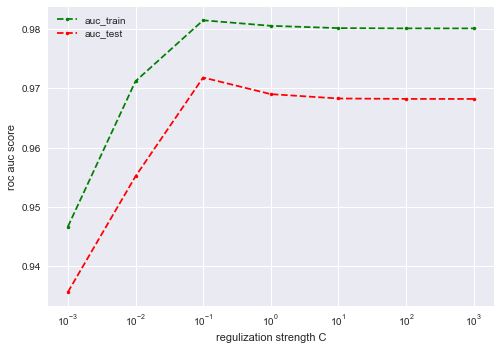

In [27]:
plt.plot(c,auc_train,'.--g',label='auc_train')
plt.plot(c,auc_test,'.--r',label='auc_test')
plt.legend()
plt.xscale('log')
plt.xlabel('regulization strength C')
plt.ylabel('roc auc score')
plt.grid('on')
plt.show()

In [28]:
auc_test 

[0.9356950982423937,
 0.9551659413210172,
 0.9717781659446105,
 0.9689855358511544,
 0.9682519005371835,
 0.9681824252532132,
 0.9681746619165572]

#### Highest testing auc meets when c=0.1, less regulization than this will cause decrease in roc auc in both training and testing data
#### Then we use C=0.1 to apply lasso+logistic regression classifier

### 2.4 Try also Lasso(L1)+logistic regression classifier to the training data

In [36]:
Logit_Lasso = LogisticRegression(penalty='l1',solver='liblinear',C=0.1)
Logit_Lasso.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred_test = Logit_Lasso.predict(X_test)

In [38]:
y_proba_test =Logit_Lasso.predict_proba(X_test)[:,1]

In [39]:
y_pred_train = Logit_Lasso.predict(X_train)

In [40]:
y_proba_train =Logit_Lasso.predict_proba(X_train)[:,1]

## 3 Performance metrics

### 3.1 Confusion matrix and accuracy when threshold is 0.5

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_pred_train)

array([[190466,     24],
       [   127,    203]])

#### Is there overfitting?

In [42]:
# Predict class labels for the test set
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[93811,    14],
       [   68,    94]])

#### Yes, the data is imbalanced and there is overfitting 

### 3.2 AUC and graph ROC curve

#### AUC score is 0.97

In [43]:
sklearn.metrics.roc_auc_score(y_test,y_proba_test)

0.9717784948995536

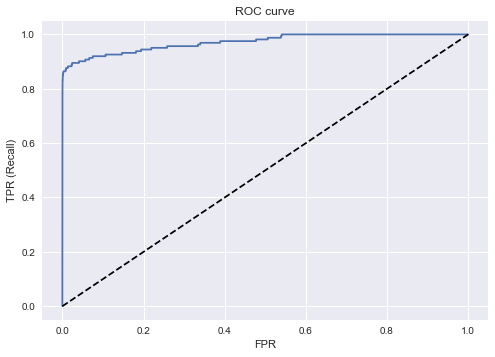

Area under curve (AUC):  0.9717784948995536


In [46]:
fpr, tpr, _ = roc_curve(y_test, y_proba_test)

plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

### 3.3 F1-score and Recall-precision tradeoff

In [49]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.87      0.58      0.70       162

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.93      0.79      0.85     93987
weighted avg       1.00      1.00      1.00     93987



In [44]:
ps_Logit_Lasso, rs_Logit_Lasso, ts_Logit_Lasso = sklearn.metrics.precision_recall_curve(y_test,y_proba_test)

/Users/luyi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


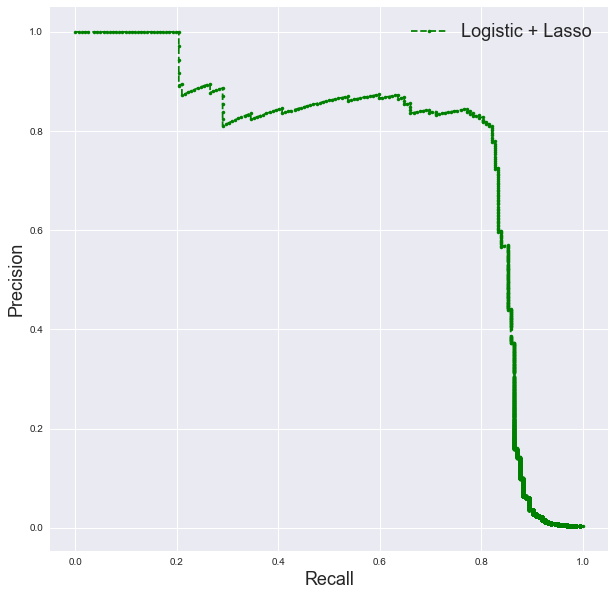

In [45]:
plt.figure(figsize=(10,10))
plt.plot(rs_Logit_Lasso, ps_Logit_Lasso, '.--g', label='Logistic + Lasso')
plt.legend(fontsize=18)
plt.grid('on')
plt.xlabel('Recall', size=18)
plt.ylabel('Precision', size=18)
plt.show()


### Business Insights:
From above precision and recall plot we can conclude: to increase precision/recall from 0.8 to 1, the recall/precision will drop dramatically, the best combination of both metrics might be 0.8 recall and 0.82 precision, but because the tradeoff relationship between recall and precision, the final optimal model selection should be based on the business focus.
#### This is data from a financial institute, we want to focus on the recall value and the f1-score

## 4 Try other techniques to improve the performance of classifier

In [51]:
logisitc_lasso_coef=pd.DataFrame({'Features':X.columns, 'Coeff':Logit_Lasso.coef_[0]})

Below are the features with non_zero coefficients after Lasso regulation

In [53]:
logisitc_lasso_coef[logisitc_lasso_coef.Coeff!=0]

,Features,Coeff
3,V3,0.028190
4,V4,0.703707
5,V5,0.015633
8,V8,-0.189460
9,V9,-0.043200
10,V10,-0.524902
11,V11,0.065526
13,V13,-0.192425
14,V14,-0.640950
15,V15,-0.033755


#### Since we have 30 features, we try the Random Forest Classifier might have a better performance as it works well in high dimension dataset.

### Random Forest

In [55]:
feature_num = [5,10,15]

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_auc_train=[]
rf_auc_test=[]
for i in feature_num:
    
    Random_Forest = RandomForestClassifier(
        random_state=2,
        n_estimators=50,
        max_features=i,
        #min_samples_leaf=35
    )
    Random_Forest.fit(X_train,y_train)      
    y_proba_test =Random_Forest.predict_proba(X_test)[:,1]
    rf_auc_test.append(sklearn.metrics.roc_auc_score(y_test,y_proba_test))
    
    y_proba_train=Random_Forest.predict_proba(X_train)[:,1]
    rf_auc_train.append(sklearn.metrics.roc_auc_score(y_train,y_proba_train))

#### Above model is very slow to run due to the large number of data, and from below plot we can tell that random forest model overfits the training data, this might due to the small number of trees in the model.
#### Next, we increase the number of trees to 600 to avoid overfitting in training data

/Users/luyi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


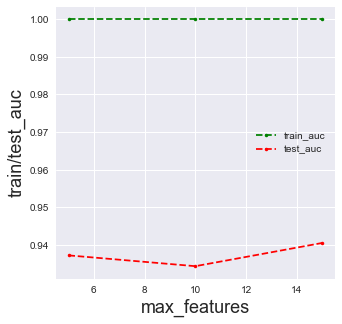

In [57]:
plt.figure(figsize=(5,5))
plt.plot(feature_num, rf_auc_train, '.--g', label='train_auc')
plt.plot(feature_num, rf_auc_test, '.--r', label='test_auc')
plt.legend()
plt.grid('on')
plt.xlabel('max_features', size=18)
plt.ylabel('train/test_auc', size=18)
plt.show()

In [58]:
Random_Forest = RandomForestClassifier(
    random_state=2,
    n_estimators=600,
    max_features=5,
    min_samples_leaf=35
)
Random_Forest.fit(X_train,y_train)     
y_proba_test =Random_Forest.predict_proba(X_test)[:,1]
y_proba_train=Random_Forest.predict_proba(X_train)[:,1]
#again, very slow to run result from big datasets

In [59]:
sklearn.metrics.roc_auc_score(y_test,y_proba_test) # slightly higher than logistic+lasso model

0.9754310132141201

In [65]:
sklearn.metrics.roc_auc_score(y_train,y_proba_train) 

0.9994957661024121

#### Might still have overfit issue, due to the high expense(long process time) to test different parameters, we will use this RF model for this study

#### Feature_importances plot (interestingly, the most important feature V17 in Random Forest is rulled out in logistic_Lasso regulation)

In [66]:
feature_importances = pd.DataFrame(Random_Forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances=feature_importances.reset_index().rename(columns={'index':'features'})

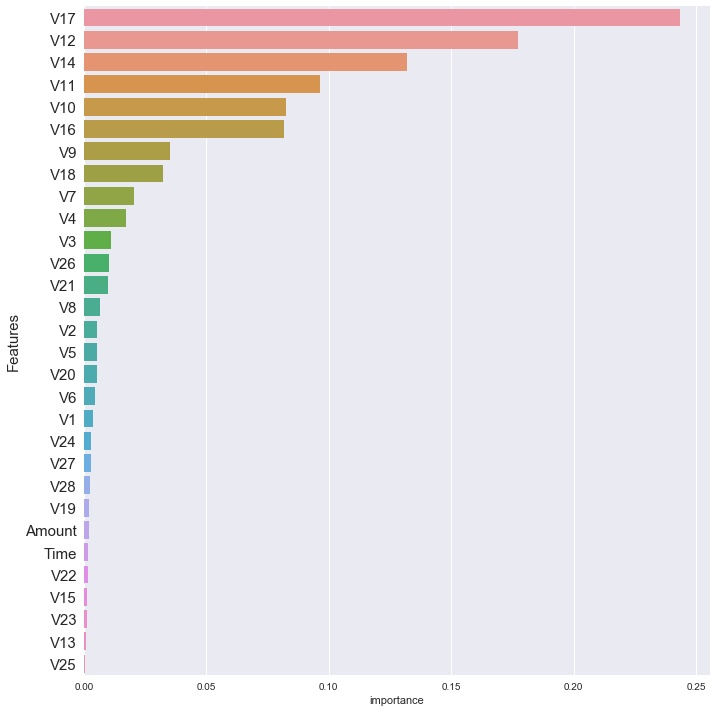

In [67]:
sns.catplot(data=feature_importances,y='features',x='importance',kind='bar', 
            legend=True, height=10)
plt.ylabel('Features', fontsize=15)
plt.rc('ytick', labelsize=15)

## 5 Compare Random Forest and Logistic Regression

In [68]:
ps_random_forest, rs_random_forest, ts_random_forest = sklearn.metrics.precision_recall_curve(y_test,y_proba_test)

/Users/luyi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


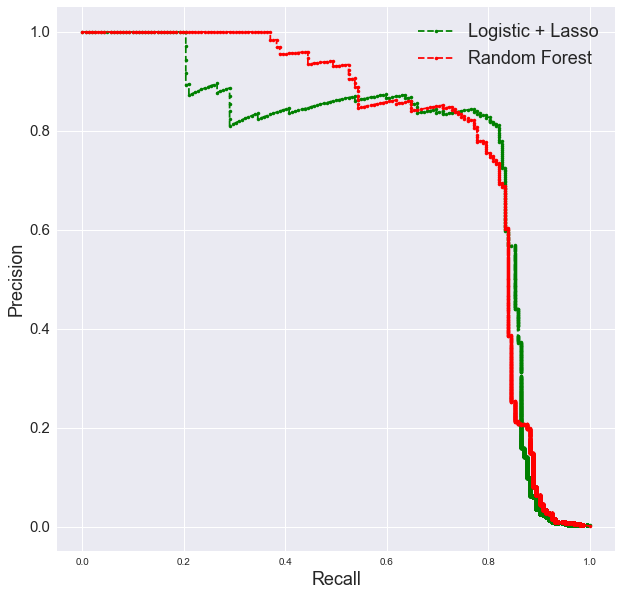

In [69]:
plt.figure(figsize=(10,10))
plt.plot(rs_Logit_Lasso, ps_Logit_Lasso, '.--g', label='Logistic + Lasso')
plt.plot(rs_random_forest,ps_random_forest,'.--r',label='Random Forest')
plt.legend(fontsize=18)
plt.grid('on')
plt.xlabel('Recall', size=18)
plt.ylabel('Precision', size=18)
plt.show()

### Technical summary: 
Regulized Logistic and Random Forest models have a fairly good performance (best combination of precision and recall is about 80% and 80%), algorithms that can handle extremely umbalanced data will definitely generate better results. Maybe methods that can emphasize the 492 fradulent data will improve models prediction as well, looking forward to learn more and improve these in the future.

### Business insights:

The precision_recall plot for both models can guide us to use different models for different business purpose.
If this company is extremly customer focus thus takes precision as the primary focus, then we should use random forest model for prediction, because when aiming at 100% precision, the best recall can be close to 40%, which means, this model can capture about 40% of the fraudulent transactions and all the predicted fraudulent class are actually true fraudulent transactions, no customers will be annoyed by wrong payment cancellations.
However, If the company cares more about company loss caused by such fraudulent activities, which means the more fraudulent transactions are caught, the better for the company, then logistic regression regulized by Lasso gains a slightly higher precision (about 82%) when aiming at 80% recall. This means 20% of fraudulent transactions will not be caught and 18% of the identified fraudulent transactions are not fraudulent, this is much better than random forest model(80% of precision) when aiming at same coverage considering the huge amount of transactions.
In short, we don't have a best model that can be applied for all business purposes, business focus should be considered when selecting model.